<a href="https://colab.research.google.com/github/ekdlakdl12/intel/blob/main/06_10_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 10s - loss: 0.0657 - accuracy: 0.6932 - val_loss: 0.0336 - val_accuracy: 0.8217 - 10s/epoch - 20ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0302 - accuracy: 0.8443 - val_loss: 0.0302 - val_accuracy: 0.8370 - 7s/epoch - 14ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0270 - accuracy: 0.8568 - val_loss: 0.0284 - val_accuracy: 0.8425 - 8s/epoch - 17ms/step
Epoch 4/30
469/469 - 5s - loss: 0.0251 - accuracy: 0.8664 - val_loss: 0.0263 - val_accuracy: 0.8541 - 5s/epoch - 12ms/step
Epoch 5/30
469/469 - 5s - loss: 0.0236 - accuracy: 0.8745 - val_loss: 0.0256 - val_accuracy: 0.8621 - 5s/epoch - 11ms/step
Epoch 6/30
469/469 - 5s - loss: 0.0225 - accuracy: 0.8802 - val_loss: 0.0243 - val_accuracy: 0.8681 - 5s/epoch - 11ms/step
Epoch 7/30
469/469 - 5s - loss: 0.0215 - accuracy: 0.8852 - val_loss: 0.0228 - val_accuracy: 0.8688 - 5s/epoch - 11ms/step
Epoch 8/30
469/469 - 5s - loss: 0.0209 - accuracy: 0.8898 - val_loss: 0.02

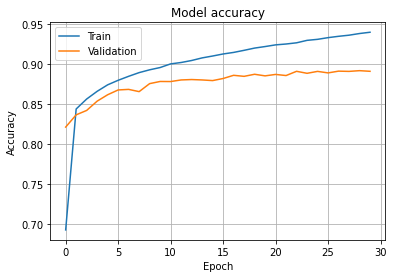

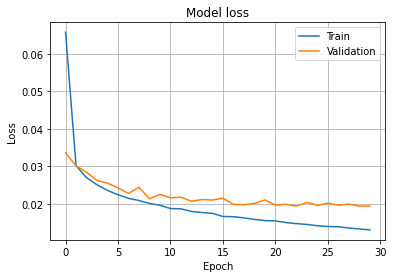

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()


